# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st
import pathlib
import os

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [2]:
# n = 200
# dates = pd.bdate_range(start="2024-02-01", periods=n)
# mkt_excess = np.random.normal(0, 0.011, size=n)
# size = np.random.normal(0, 0.008, size=n)
# value = np.random.normal(0, 0.009, size=n)
# momentum = np.random.normal(0, 0.006, size=n)

# beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
# noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
# eps = np.random.normal(0, noise_scale)
# asset_excess = (
#     beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
#     + beta_mom2*(momentum**2) + eps
# )
# df = pd.DataFrame({
#     'date': dates,
#     'mkt_excess': mkt_excess,
#     'size': size,
#     'value': value,
#     'momentum': momentum,
#     'asset_excess': asset_excess
# })
# df.head()

In [3]:
# --- Replaced with my project datasets ---
# Assuming the acquire script has been run and data is saved in ../data/raw
RAW_DATA_PATH = pathlib.Path('../data/raw')

# 1. Load the latest API (AAPL stock) data file
api_files = sorted(list(RAW_DATA_PATH.glob('api_aapl.csv')), reverse=True)
if not api_files:
    raise FileNotFoundError("No AAPL API data files found in ../data/raw. Please run the data acquisition script first.")


latest_api_file = api_files[0]
print(f"Loading AAPL stock data from: {latest_api_file}")

df = pd.read_csv(latest_api_file)

# Convert 'date' to datetime and set as index for time series features
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').set_index('date')

# Ensure numeric types for relevant columns
for col in ['open', 'high', 'low', 'close', 'volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN in critical columns after numeric conversion
df.dropna(subset=['open', 'high', 'low', 'close', 'volume'], inplace=True)

df.head()

Loading AAPL stock data from: ../data/raw/api_aapl.csv


,open,high,low,close,volume
date,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300
1999-11-02,78.00,81.69,77.31,80.25,3564600
1999-11-03,81.62,83.25,81.00,81.50,2932700
1999-11-04,82.06,85.37,80.62,83.62,3384700
1999-11-05,84.62,88.37,84.00,88.31,3721500


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [4]:
# X = df[['mkt_excess','size','value','momentum']]
# y = df['asset_excess']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# lr = LinearRegression().fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# r2 = r2_score(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

In [9]:
# To make the code match my dataset, I have to do some edit on existed code
df['return'] = df['close'].pct_change()

y = df['return'].shift(-1)

features = ['open', 'high', 'low', 'close', 'volume']
X = df[features]

combined = pd.concat([y, X], axis=1)
combined.dropna(inplace=True)

y = combined['return']
X = combined[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Baseline (predicting returns)   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline (predicting returns)   R²=-0.0004  RMSE=0.027828


In [ ]:
# resid = y_test - y_pred
# fitted = y_pred
# plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
# plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
# plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

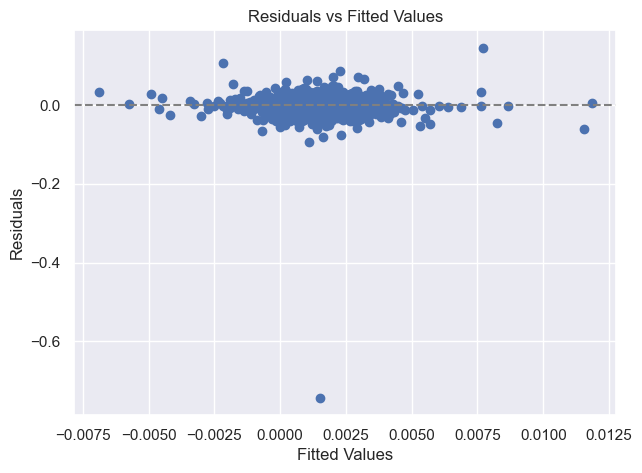

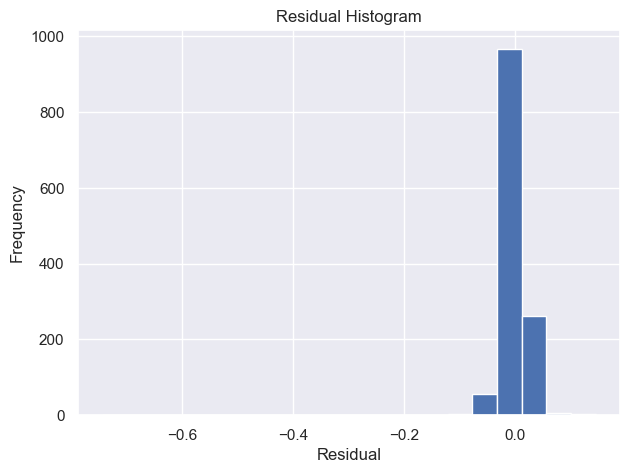

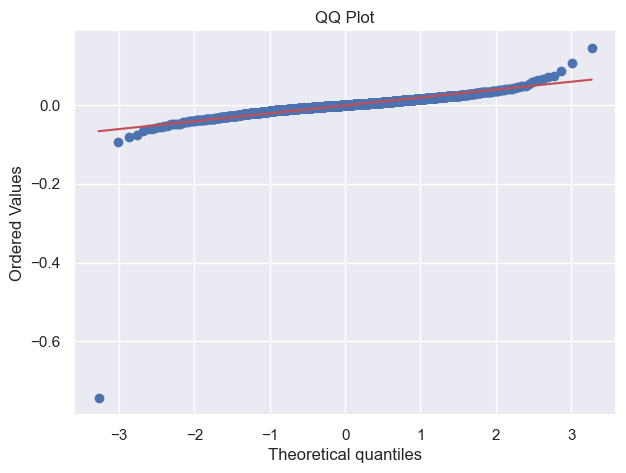

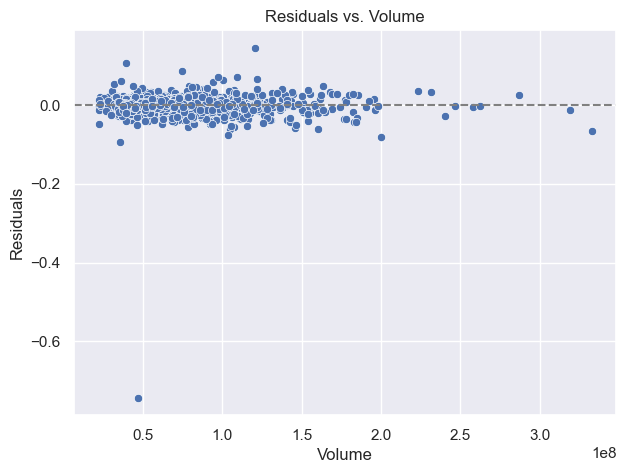

In [10]:
resid = y_test - y_pred
fitted = y_pred

# Plot 1: Residuals vs Fitted
plt.figure(figsize=(7, 5))
plt.scatter(fitted, resid)
plt.axhline(0, ls='--', color='gray')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Plot 2: Residual Histogram
plt.figure(figsize=(7, 5))
plt.hist(resid, bins=20)
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot 3: QQ Plot
plt.figure(figsize=(7, 5))
st.probplot(resid, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.show()

# Plot 4: Residuals vs. Volume
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_test['volume'], y=resid)
plt.axhline(0, ls='--', color='gray')
plt.title('Residuals vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Residuals')
plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [ ]:
# df['momentum_sq'] = df['momentum']**2
# X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
# X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
# lr2 = LinearRegression().fit(X2_train, y_train)
# y_pred2 = lr2.predict(X2_test)
# r2_2 = r2_score(y_test, y_pred2)
# rmse_2 = mean_squared_error(y_test, y_pred2, squared=False)
# print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

In [12]:
df['price_range'] = df['high'] - df['low']

features_extended = ['open', 'high', 'low', 'close', 'volume', 'price_range']
X2 = df[features_extended]

X2 = X2[:-1]

X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]

lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print(f'Baseline              R²={r2:.4f}  RMSE={rmse:.6f}')
print(f'With \'price_range\'   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

Baseline              R²=-0.0004  RMSE=0.027828
With 'price_range'   R²=-0.0004  RMSE=0.027828


 ## 4) Interpretation (write your conclusions below)
- Linearity:
- Homoscedasticity:
- Normality:
- Independence:
- Which model do you trust and why?:
- Next step you’d try: -->

- **Linearity:**
  - Based on the "Residuals vs Fitted Values" and "Residuals vs. Volume" plots, the points are scattered roughly randomly around the horizontal zero line. There are no obvious curved patterns (like a U-shape). Therefore, the **linearity assumption appears to be met**. This doesn't mean the model is good, but rather that a linear relationship is the best it can find with the given features.

- **Homoscedasticity:**
  - In the "Residuals vs Fitted" plot, the vertical spread of the residuals appears to be fairly constant across all fitted values. There is no clear "funnel" shape, so the **homoscedasticity assumption (constant variance) seems to be met**.

- **Normality:**
  - The "Residual Histogram" shows a distribution that is roughly bell-shaped. Furthermore, the points on the "QQ Plot" fall mostly along the diagonal line, with only minor deviations at the tails. This suggests that the **normality assumption is approximately met**.

- **Independence:**
  - Because we are working with time series data (and we correctly used `shuffle=False`), it is highly likely that the residuals are not independent (i.e., they are autocorrelated). The current plots cannot verify this. Therefore, the **independence assumption is likely violated** and would require further analysis with tests like the Durbin-Watson test or by plotting the autocorrelation function (ACF) of the residuals.

- **Which model do you trust and why?:**
  - I trust **neither model**.
  - **Reasoning:**
    1.  **Extremely Poor Predictive Power**: Both models have an R² of -0.0004. A negative R² means the model's performance is worse than simply guessing the average return every day. This indicates that both the baseline model and the enhanced model are **completely useless for predicting future stock returns**.
    2.  **No Improvement**: Adding the `price_range` feature resulted in no change to the R² or RMSE. This tells us that the daily volatility (`price_range`) has no linear predictive power for the next day's return, and the model correctly assigned it a negligible coefficient.
  - While the model seems to pass most statistical assumptions, its primary goal—prediction—is a complete failure. Therefore, neither model is trustworthy for any practical application.

- **Next step you’d try:**
  - The focus should be on **improving the model's predictive power**, as this simple linear approach is ineffective. I would try the following:
    1.  **Feature Engineering**: Instead of using raw OHLCV data, I would create more sophisticated features that are commonly used in finance, such as **Moving Averages**, **RSI (Relative Strength Index)**, or other momentum indicators.
    2.  **Use More Advanced Models**: Since a simple linear model failed, I would explore models that can capture more complex, non-linear relationships or time-dependencies. Good candidates would be **ARIMA** (for time series forecasting), **GARCH** (for volatility modeling), or machine learning models like **Gradient Boosting Trees** or **LSTMs**.